In [ ]:
# 文件內容： TEDS 分析 

In [1]:
# 環境 setup
%matplotlib notebook
from dbfread import DBF
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
point_file = "dataset/TEDS10 POINT TWD97.dbf" 
line_file = "dataset/TEDS10_LINE_TWD97.dbf"
#area_file = "dataset/TEDS10_AREA_WGS84.dbf" # r2 OK
area_file = "dataset/TEDS10_AREA_TWD97.dbf"


import ezodf
def read_ods(filename, sheet_no=0, header=0):
    tab = ezodf.opendoc(filename=filename).sheets[sheet_no]
    return pd.DataFrame({col[header].value:[x.value for x in col[header+1:]]
                         for col in tab.columns()})
town_df = read_ods('dataset/db.ods',0,0)
city_df = read_ods('dataset/db.ods',1,0)
board_df = read_ods('dataset/db.ods',2,0)
towncode_df = read_ods('dataset/db.ods',3,0)

In [75]:
# 已有點線面和資料檔，而且不需要單獨分析點，線，面 可以直些使用這個
pla_df = pd.read_csv('dataset/點線面_鄉鎮_PM25.csv')

In [ ]:
# study history
# 點源 dbf 可以 load, 但是整個印出來會有 unicode error
# 點源 sdf 不可以直接 load
# 點,線,面源載入都需要好幾分鐘 轉 df 需 5 分鐘

In [30]:
# 載入點源
from dbfread import DBF
import pandas as pd 
point_file = "dataset/TEDS10 POINT TWD97.dbf" 
line_file = "dataset/TEDS10_LINE_TWD97.dbf"
area_file = "dataset/TEDS10_AREA_TWD97.dbf"
point_file1 = "dataset/TEDS10 POINT TWD97.dbf" 
point_table = DBF(point_file,char_decode_errors='ignore',encoding='big5',load=True)
cols = []
for field in point_table.fields:
    cols.append(field.name)
    #print("name=%s,type=%s" %(field.name,field.type))
point_df = pd.DataFrame(point_table.records,  columns =cols) 
point_df


,SERIAL_NO,DICT_NO,C_NO,SCC,NO_P,FC,TSP_EMI,PM_EMI,X_BLANK1,PM25_EMI,...,PB_EFF,ID_AREA,COMP_NAM,ZS,TSP_RANK,SOX_RANK,NOX_RANK,VOC_RANK,CO_RANK,PB_RANK
0,1,0101,A3400047,10200602,E003,FUL,0.049,0.046,0,0.044,...,0.0,99,兄弟大飯店股份有限公司。,0,B,B,B,U,D,D
1,2,0101,A3400047,10200602,E004,FUL,0.000,0.000,0,0.000,...,0.0,99,兄弟大飯店股份有限公司。,0,B,B,B,U,D,D
2,3,0101,A3400047,40100103,E001,,0.000,0.000,0,0.000,...,0.0,99,兄弟大飯店股份有限公司。,0,D,B,B,D,D,D
3,4,0101,A3400109,10200602,E001,FUL,0.000,0.000,0,0.000,...,0.0,99,財團法人基督復臨安息日會台安醫院。,0,B,D,D,U,D,D
4,5,0101,A3400109,10200602,E002,FUL,0.000,0.000,0,0.000,...,0.0,99,財團法人基督復臨安息日會台安醫院。,0,B,D,D,U,D,D
5,6,0101,A3400118,10200603,E001,FUL,0.000,0.000,0,0.000,...,0.0,99,長庚醫療財團法人長庚紀念醫院。,0,C,D,D,U,D,D
6,7,0101,A3400118,10200603,E002,FUL,0.000,0.000,0,0.000,...,0.0,99,長庚醫療財團法人長庚紀念醫院。,0,C,D,D,U,D,D
7,8,0101,A3400172,10200602,E004,FUL,0.012,0.011,0,0.011,...,0.0,99,西華大飯店股份有限公司。,0,B,D,D,U,D,D
8,9,0101,A3400172,10200602,E005,FUL,0.012,0.011,0,0.011,...,0.0,99,西華大飯店股份有限公司。,0,B,D,D,U,D,D
9,10,0101,A3400172,10200602,E006,FUL,0.012,0.011,0,0.011,...,0.0,99,西華大飯店股份有限公司。,0,B,D,D,U,D,D


In [11]:
# 載入線源
from dbfread import DBF
import pandas as pd 
point_file = "dataset/TEDS10 POINT TWD97.dbf" 
line_file = "dataset/TEDS10_LINE_TWD97.dbf"
area_file = "dataset/TEDS10_AREA_TWD97.dbf"

line_table = DBF(line_file,char_decode_errors='ignore',encoding='big5',load=True)
cols = []
for field in line_table.fields:
    cols.append(field.name)
    #print("name=%s,type=%s" %(field.name,field.type))
line_df = pd.DataFrame(line_table.records,  columns =cols) 
line_df

,NSC,NSC_SUB,UTME,UTMN,DICT,EM_TSP,EM_PM,EM_PM6,EM_PM25,EM_SOX,EM_NOX,EM_THC,EM_NMHC,EM_EXHC,EM_EHC,EM_RHC,EM_RST,EM_CO,EM_PB,EM_NH3
0,pldgv,1,168000,2553000,4121,0.064520,0.036838,0.0,0.026573,0.000330,0.181514,0.181595,0.163323,0.059609,0.068341,0.030411,0.023234,0.276882,0.000070,0.0
1,bldgv,1,168000,2553000,4121,0.002899,0.001655,0.0,0.001194,0.000017,0.002922,0.004787,0.004305,0.001952,0.001250,0.001167,0.000418,0.005721,0.000004,0.0
2,plddv,1,168000,2553000,4121,0.004339,0.002552,0.0,0.001880,0.000034,0.008344,0.000404,0.000404,0.000404,0.000000,0.000000,0.000000,0.002240,0.000000,0.0
3,blddv,1,168000,2553000,4121,0.000461,0.000256,0.0,0.000181,0.000004,0.000611,0.000057,0.000057,0.000057,0.000000,0.000000,0.000000,0.000261,0.000000,0.0
4,pldgt,1,168000,2553000,4121,0.010155,0.005836,0.0,0.004227,0.000068,0.088686,0.089420,0.080415,0.066015,0.014197,0.005613,0.003595,0.441811,0.000014,0.0
5,bldgt,1,168000,2553000,4121,0.000211,0.000121,0.0,0.000087,0.000002,0.000027,0.000339,0.000305,0.000140,0.000107,0.000046,0.000046,0.000357,0.000000,0.0
6,plddt,1,168000,2553000,4121,0.031218,0.026653,0.0,0.023327,0.000092,0.116640,0.004923,0.004923,0.004923,0.000000,0.000000,0.000000,0.042281,0.000000,0.0
7,blddt,1,168000,2553000,4121,0.000737,0.000465,0.0,0.000357,0.000006,0.001712,0.000168,0.000168,0.000168,0.000000,0.000000,0.000000,0.000638,0.000000,0.0
8,phdgv,1,168000,2553000,4121,0.000016,0.000013,0.0,0.000011,0.000000,0.000240,0.000009,0.000009,0.000009,0.000000,0.000000,0.000000,0.000036,0.000000,0.0
9,bhdgv,1,168000,2553000,4121,0.000575,0.000407,0.0,0.000331,0.000003,0.007633,0.000230,0.000230,0.000230,0.000000,0.000000,0.000000,0.001269,0.000000,0.0


In [2]:
# 載入面源 ，轉 df 需 5 分鐘
from dbfread import DBF
import pandas as pd 
point_file = "dataset/TEDS10 POINT TWD97.dbf" 
line_file = "dataset/TEDS10_LINE_TWD97.dbf"
area_file = "dataset/TEDS10_AREA_TWD97.dbf"

area_table = DBF(area_file,char_decode_errors='ignore',encoding='big5',load=True)
cols = []
for field in area_table.fields:
    cols.append(field.name)
    #print("name=%s,type=%s" %(field.name,field.type))
area_df = pd.DataFrame(area_table.records,  columns =cols) 
area_df

,UTME,UTMN,NSC,NSC_SUB,DICT,EM_TSP,EM_PM,EM_PM6,EM_PM25,EM_SOX,EM_NOX,EM_THC,EM_NMHC,EM_CO,EM_PB,EM_NH3
0,304000,2770000,1,,0101,0.001463,0.001404,0.0,0.001316,0.006809,0.027165,0.002090,0.001672,0.015672,0.0,0.0
1,304000,2771000,1,,0101,0.008405,0.008069,0.0,0.007565,0.039124,0.156094,0.012007,0.009606,0.090054,0.0,0.0
2,304000,2772000,1,,0101,0.010621,0.010196,0.0,0.009559,0.049438,0.197247,0.015173,0.012138,0.113796,0.0,0.0
3,304000,2773000,1,,0101,0.004287,0.004115,0.0,0.003858,0.019955,0.079615,0.006124,0.004899,0.045932,0.0,0.0
4,305000,2770000,1,,0101,0.036153,0.034707,0.0,0.032537,0.168282,0.671408,0.051647,0.041317,0.387351,0.0,0.0
5,305000,2771000,1,,0101,0.133488,0.128148,0.0,0.120139,0.621354,2.479060,0.190697,0.152558,1.430227,0.0,0.0
6,305000,2772000,1,,0101,0.134252,0.128882,0.0,0.120826,0.624909,2.493244,0.191788,0.153430,1.438410,0.0,0.0
7,305000,2773000,1,,0101,0.006858,0.006584,0.0,0.006172,0.031924,0.127369,0.009798,0.007838,0.073482,0.0,0.0
8,305000,2774000,1,,0101,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,306000,2770000,1,,0101,0.013381,0.012846,0.0,0.012043,0.062287,0.248513,0.019116,0.015293,0.143373,0.0,0.0


In [5]:
# 點線面 資料狀況描述
#point_df
#line_df
#area_df
#pd.set_option('display.max_rows', None)
dfs = [['點源',point_df,point_table],['線源',line_df,line_table],['面源',area_df,area_table]]
#dfs = [['線源',line_df, line_table]]
for name, tmp_df, tmp_table in dfs:
    print("---- %s 資料狀況描述 ----" %(name))
    print(tmp_df.shape)
    print("---- columns ----\n%s" % tmp_df.columns)
    print("---- first record ----")
    print(tmp_df.iloc[0])
    print("---- field definition ----")
    # col definition
    for field in tmp_table.fields:
        print("name=%s,type=%s" %(field.name,field.type))


---- 點源 資料狀況描述 ----
(218004, 72)
---- columns ----
Index(['SERIAL_NO', 'DICT_NO', 'C_NO', 'SCC', 'NO_P', 'FC', 'TSP_EMI',
       'PM_EMI', 'X_BLANK1', 'PM25_EMI', 'SOX_EMI', 'NOX_EMI', 'THC_EMI',
       'NMHC_EMI', 'CO_EMI', 'PB_EMI', 'COMP_KIND1', 'UTM_E', 'UTM_N',
       'ORI_QU1', 'X_BLANK2', 'DIA', 'X_BLANK3', 'HEI', 'X_BLANK4', 'TEMP',
       'X_BLANK5', 'VEL', 'ASSUME_Q', 'ASSUME_D', 'ASSUME_H', 'ASSUME_T',
       'ASSUME_V', 'NO_S', 'ASSUME_HD', 'HD1', 'ASSUME_DW', 'DW1', 'ASSUME_WY',
       'WY1', 'X_BLANK6', 'X_BLANK7', 'X_BLANK8', 'X_BLANK9', 'X_BLANK10',
       'X_BLANK11', 'EQ_1', 'A_NAME1', 'EQ_2', 'A_NAME2', 'EQ_3', 'A_NAME3',
       'EQ_4', 'A_NAME4', 'EQ_5', 'A_NAME5', 'TSP_EFF', 'TSP_EFF1', 'SOX_EFF',
       'NOX_EFF', 'VOC_EFF', 'CO_EFF', 'PB_EFF', 'ID_AREA', 'COMP_NAM', 'ZS',
       'TSP_RANK', 'SOX_RANK', 'NOX_RANK', 'VOC_RANK', 'CO_RANK', 'PB_RANK'],
      dtype='object')
---- first record ----
SERIAL_NO                1
DICT_NO               0101
C_NO             

In [ ]:
"""
---- 點源 資料狀況描述 ----
(218004, 72)
---- columns ----
Index(['SERIAL_NO', 'DICT_NO', 'C_NO', 'SCC', 'NO_P', 'FC', 'TSP_EMI',
       'PM_EMI', 'X_BLANK1', 'PM25_EMI', 'SOX_EMI', 'NOX_EMI', 'THC_EMI',
       'NMHC_EMI', 'CO_EMI', 'PB_EMI', 'COMP_KIND1', 'UTM_E', 'UTM_N',
       'ORI_QU1', 'X_BLANK2', 'DIA', 'X_BLANK3', 'HEI', 'X_BLANK4', 'TEMP',
       'X_BLANK5', 'VEL', 'ASSUME_Q', 'ASSUME_D', 'ASSUME_H', 'ASSUME_T',
       'ASSUME_V', 'NO_S', 'ASSUME_HD', 'HD1', 'ASSUME_DW', 'DW1', 'ASSUME_WY',
       'WY1', 'X_BLANK6', 'X_BLANK7', 'X_BLANK8', 'X_BLANK9', 'X_BLANK10',
       'X_BLANK11', 'EQ_1', 'A_NAME1', 'EQ_2', 'A_NAME2', 'EQ_3', 'A_NAME3',
       'EQ_4', 'A_NAME4', 'EQ_5', 'A_NAME5', 'TSP_EFF', 'TSP_EFF1', 'SOX_EFF',
       'NOX_EFF', 'VOC_EFF', 'CO_EFF', 'PB_EFF', 'ID_AREA', 'COMP_NAM', 'ZS',
       'TSP_RANK', 'SOX_RANK', 'NOX_RANK', 'VOC_RANK', 'CO_RANK', 'PB_RANK'],
      dtype='object')
---- first record ----
SERIAL_NO                1
DICT_NO               0101
C_NO              A3400047
SCC               10200602
NO_P                  E003
FC                     FUL
TSP_EMI              0.049
PM_EMI               0.046
X_BLANK1                 0
PM25_EMI             0.044
SOX_EMI                  0
NOX_EMI               1.53
THC_EMI                  0
NMHC_EMI                 0
CO_EMI                0.36
PB_EMI                   0
COMP_KIND1            5510
UTM_E               304946
UTM_N              2771708
ORI_QU1               92.8
X_BLANK2                  
DIA                    1.1
X_BLANK3                  
HEI                   51.1
X_BLANK4                  
TEMP                    70
X_BLANK5                  
VEL                    2.2
ASSUME_Q                  
ASSUME_D                  
ASSUME_H                  
ASSUME_T                  
ASSUME_V                  
NO_S                  P002
ASSUME_HD                 
HD1                     15
ASSUME_DW                 
DW1                      7
ASSUME_WY                 
WY1                     52
X_BLANK6                  
X_BLANK7                 0
X_BLANK8                  
X_BLANK9                  
X_BLANK10                0
X_BLANK11                0
EQ_1                      
A_NAME1                  　
EQ_2                      
A_NAME2                  　
EQ_3                      
A_NAME3                  　
EQ_4                      
A_NAME4                  　
EQ_5                      
A_NAME5                  　
TSP_EFF                  0
TSP_EFF1                 0
SOX_EFF                  0
NOX_EFF                  0
VOC_EFF                  0
CO_EFF                   0
PB_EFF                   0
ID_AREA                 99
COMP_NAM      兄弟大飯店股份有限公司。
ZS                       0
TSP_RANK                 B
SOX_RANK                 B
NOX_RANK                 B
VOC_RANK                 U
CO_RANK                  D
PB_RANK                  D
Name: 0, dtype: object
---- field definition ----
name=SERIAL_NO,type=N
name=DICT_NO,type=C
name=C_NO,type=C
name=SCC,type=C
name=NO_P,type=C
name=FC,type=C
name=TSP_EMI,type=N
name=PM_EMI,type=N
name=X_BLANK1,type=N
name=PM25_EMI,type=N
name=SOX_EMI,type=N
name=NOX_EMI,type=N
name=THC_EMI,type=N
name=NMHC_EMI,type=N
name=CO_EMI,type=N
name=PB_EMI,type=N
name=COMP_KIND1,type=C
name=UTM_E,type=C
name=UTM_N,type=C
name=ORI_QU1,type=N
name=X_BLANK2,type=C
name=DIA,type=N
name=X_BLANK3,type=C
name=HEI,type=N
name=X_BLANK4,type=C
name=TEMP,type=N
name=X_BLANK5,type=C
name=VEL,type=N
name=ASSUME_Q,type=C
name=ASSUME_D,type=C
name=ASSUME_H,type=C
name=ASSUME_T,type=C
name=ASSUME_V,type=C
name=NO_S,type=C
name=ASSUME_HD,type=C
name=HD1,type=N
name=ASSUME_DW,type=C
name=DW1,type=N
name=ASSUME_WY,type=C
name=WY1,type=N
name=X_BLANK6,type=C
name=X_BLANK7,type=N
name=X_BLANK8,type=C
name=X_BLANK9,type=C
name=X_BLANK10,type=N
name=X_BLANK11,type=N
name=EQ_1,type=C
name=A_NAME1,type=C
name=EQ_2,type=C
name=A_NAME2,type=C
name=EQ_3,type=C
name=A_NAME3,type=C
name=EQ_4,type=C
name=A_NAME4,type=C
name=EQ_5,type=C
name=A_NAME5,type=C
name=TSP_EFF,type=N
name=TSP_EFF1,type=N
name=SOX_EFF,type=N
name=NOX_EFF,type=N
name=VOC_EFF,type=N
name=CO_EFF,type=N
name=PB_EFF,type=N
name=ID_AREA,type=C
name=COMP_NAM,type=C
name=ZS,type=N
name=TSP_RANK,type=C
name=SOX_RANK,type=C
name=NOX_RANK,type=C
name=VOC_RANK,type=C
name=CO_RANK,type=C
name=PB_RANK,type=C
---- 線源 資料狀況描述 ----
(620067, 20)
---- columns ----
Index(['NSC', 'NSC_SUB', 'UTME', 'UTMN', 'DICT', 'EM_TSP', 'EM_PM', 'EM_PM6',
       'EM_PM25', 'EM_SOX', 'EM_NOX', 'EM_THC', 'EM_NMHC', 'EM_EXHC', 'EM_EHC',
       'EM_RHC', 'EM_RST', 'EM_CO', 'EM_PB', 'EM_NH3'],
      dtype='object')
---- first record ----
NSC           pldgv
NSC_SUB           1
UTME         168000
UTMN        2553000
DICT           4121
EM_TSP      0.06452
EM_PM      0.036838
EM_PM6            0
EM_PM25    0.026573
EM_SOX      0.00033
EM_NOX     0.181514
EM_THC     0.181595
EM_NMHC    0.163323
EM_EXHC    0.059609
EM_EHC     0.068341
EM_RHC     0.030411
EM_RST     0.023234
EM_CO      0.276882
EM_PB         7e-05
EM_NH3            0
Name: 0, dtype: object
---- field definition ----
name=NSC,type=C
name=NSC_SUB,type=C
name=UTME,type=N
name=UTMN,type=N
name=DICT,type=C
name=EM_TSP,type=N
name=EM_PM,type=N
name=EM_PM6,type=N
name=EM_PM25,type=N
name=EM_SOX,type=N
name=EM_NOX,type=N
name=EM_THC,type=N
name=EM_NMHC,type=N
name=EM_EXHC,type=N
name=EM_EHC,type=N
name=EM_RHC,type=N
name=EM_RST,type=N
name=EM_CO,type=N
name=EM_PB,type=N
name=EM_NH3,type=N
---- 面源 資料狀況描述 ----
(2601530, 16)
---- columns ----
Index(['WGS84_E', 'WGS84_N', 'NSC', 'NSC_SUB', 'DICT', 'EM_TSP', 'EM_PM',
       'EM_PM6', 'EM_PM25', 'EM_SOX', 'EM_NOX', 'EM_THC', 'EM_NMHC', 'EM_CO',
       'EM_PB', 'EM_NH3'],
      dtype='object')
---- first record ----
WGS84_E     121.535
WGS84_N     25.0372
NSC               1
NSC_SUB            
DICT           0101
EM_TSP     0.001463
EM_PM      0.001404
EM_PM6            0
EM_PM25    0.001316
EM_SOX     0.006809
EM_NOX     0.027165
EM_THC      0.00209
EM_NMHC    0.001672
EM_CO      0.015672
EM_PB             0
EM_NH3            0
Name: 0, dtype: object
---- field definition ----
name=WGS84_E,type=N
name=WGS84_N,type=N
name=NSC,type=C
name=NSC_SUB,type=C
name=DICT,type=C
name=EM_TSP,type=N
name=EM_PM,type=N
name=EM_PM6,type=N
name=EM_PM25,type=N
name=EM_SOX,type=N
name=EM_NOX,type=N
name=EM_THC,type=N
name=EM_NMHC,type=N
name=EM_CO,type=N
name=EM_PB,type=N
name=EM_NH3,type=N
"""

<IPython.core.display.Javascript object>


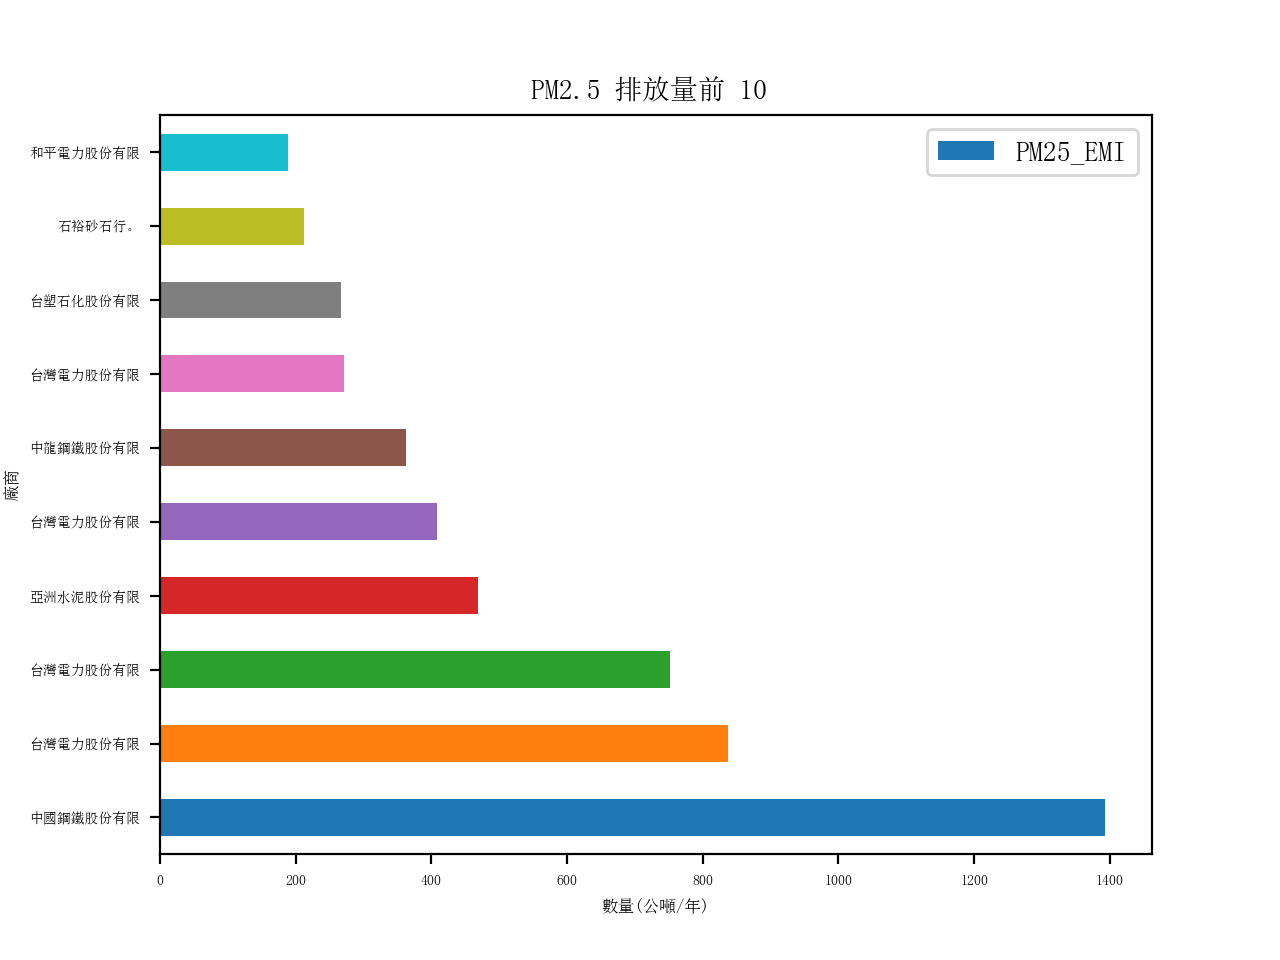

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

In [9]:
# 點源 PM2.5 排放量，依 管制編號 排序
mon_s = point_df.groupby('COMP_NAM')['PM25_EMI'].sum().sort_values(ascending=False)[:10]
df = pd.DataFrame(mon_s)
df=df.reset_index()
df['COMP_NAM']=df['COMP_NAM'].str[:8]
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df.plot('COMP_NAM',y='PM25_EMI',kind='barh') #line type have problem
plt.title("PM2.5 排放量前 10 ",fontproperties=myfont) 
plt.ylabel('廠商',fontproperties=myfont,size=6)
plt.xlabel('數量(公噸/年)',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)
#point_df[point_df['COMP_NAM'].isin(mon_s.index)]

<IPython.core.display.Javascript object>


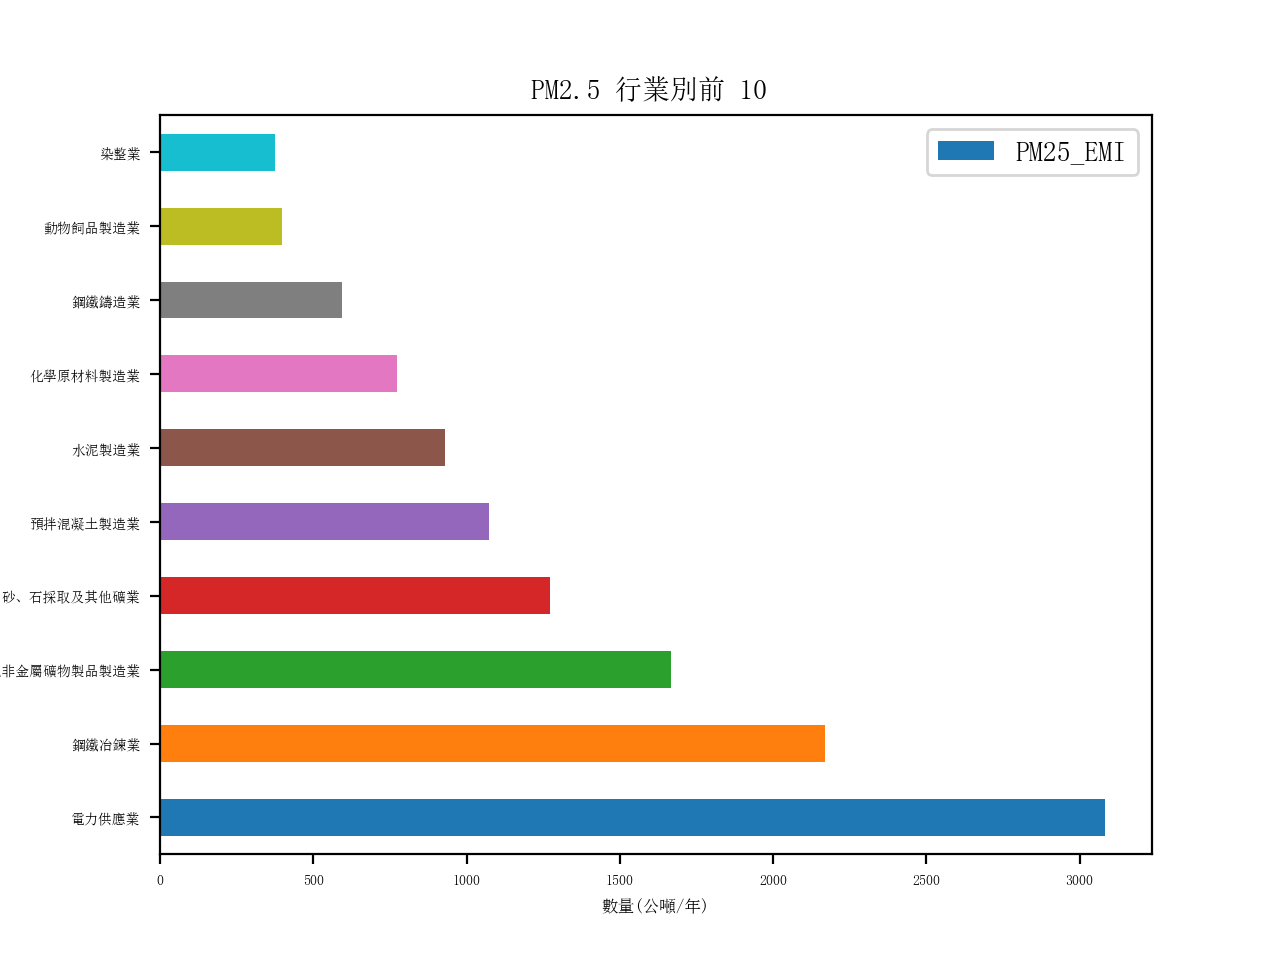

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

In [15]:
# 點源 PM2.5 行業別 排序，畫圖, 需先設定 board_df (從表TEDS-10 TEDS資料庫中行業別代碼對照表來)
mon_s = point_df.groupby('COMP_KIND1')['PM25_EMI'].sum().sort_values(ascending=False)[:10]
df = pd.DataFrame(mon_s)
df=df.reset_index()
df=df.astype({'COMP_KIND1': 'int64'})
board_df=board_df.astype({'行業別代碼': 'int64'})
df = pd.merge(df, board_df, left_on='COMP_KIND1',right_on='行業別代碼', how='left')
myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf')
df.plot('行業別名稱',y='PM25_EMI',kind='barh') #line type have problem
plt.title("PM2.5 行業別前 10 ",fontproperties=myfont) 
plt.ylabel('行業別',fontproperties=myfont,size=6)
plt.xlabel('數量(公噸/年)',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)

In [12]:
#board_df = read_ods('dataset/db.ods',2,0)
board_df

,行業別代碼,行業別名稱
0,0111,稻作栽培業
1,0113,特用作物栽培業
2,0116,食用菇蕈栽培業
3,0117,花卉栽培業
4,0121,牛飼育業
5,0122,豬飼育業
6,0129,其他畜牧業
7,0130,農事及畜牧服務業
8,0200,林業
9,0500,石油及天然氣礦業


In [19]:
point_df.columns

Index(['SERIAL_NO', 'DICT_NO', 'C_NO', 'SCC', 'NO_P', 'FC', 'TSP_EMI',
       'PM_EMI', 'X_BLANK1', 'PM25_EMI', 'SOX_EMI', 'NOX_EMI', 'THC_EMI',
       'NMHC_EMI', 'CO_EMI', 'PB_EMI', 'COMP_KIND1', 'UTM_E', 'UTM_N',
       'ORI_QU1', 'X_BLANK2', 'DIA', 'X_BLANK3', 'HEI', 'X_BLANK4', 'TEMP',
       'X_BLANK5', 'VEL', 'ASSUME_Q', 'ASSUME_D', 'ASSUME_H', 'ASSUME_T',
       'ASSUME_V', 'NO_S', 'ASSUME_HD', 'HD1', 'ASSUME_DW', 'DW1', 'ASSUME_WY',
       'WY1', 'X_BLANK6', 'X_BLANK7', 'X_BLANK8', 'X_BLANK9', 'X_BLANK10',
       'X_BLANK11', 'EQ_1', 'A_NAME1', 'EQ_2', 'A_NAME2', 'EQ_3', 'A_NAME3',
       'EQ_4', 'A_NAME4', 'EQ_5', 'A_NAME5', 'TSP_EFF', 'TSP_EFF1', 'SOX_EFF',
       'NOX_EFF', 'VOC_EFF', 'CO_EFF', 'PB_EFF', 'ID_AREA', 'COMP_NAM', 'ZS',
       'TSP_RANK', 'SOX_RANK', 'NOX_RANK', 'VOC_RANK', 'CO_RANK', 'PB_RANK'],
      dtype='object')

In [19]:
# 直接讀回 pla_df
#pla_df = pd.read_csv('output/TEDSSUM.csv')
towncode_df

,鄉鎮代碼,鄉鎮名稱,縣市代碼,縣市名稱,AREA,TOWNID,TOWNCODE,TOWNENG,COUNTYID,COUNTYCODE
0,3803.0,草屯鎮,38.0,南投縣,南投縣草屯鎮,M03,10008030.0,Caotun Township,M,10008.0
1,3801.0,南投市,38.0,南投縣,南投縣南投市,M01,10008010.0,Nantou City,M,10008.0
2,3804.0,竹山鎮,38.0,南投縣,南投縣竹山鎮,M04,10008040.0,Zhushan Township,M,10008.0
3,3802.0,埔里鎮,38.0,南投縣,南投縣埔里鎮,M02,10008020.0,Puli Township,M,10008.0
4,3810.0,國姓鄉,38.0,南投縣,南投縣國姓鄉,M10,10008100.0,Guoxing Township,M,10008.0
5,3806.0,名間鄉,38.0,南投縣,南投縣名間鄉,M06,10008060.0,Mingjian Township,M,10008.0
6,3808.0,中寮鄉,38.0,南投縣,南投縣中寮鄉,M08,10008080.0,Zhongliao Township,M,10008.0
7,3805.0,集集鎮,38.0,南投縣,南投縣集集鎮,M05,10008050.0,Jiji Township,M,10008.0
8,3813.0,仁愛鄉,38.0,南投縣,南投縣仁愛鄉,M13,10008130.0,Renai Township,M,10008.0
9,3811.0,水里鄉,38.0,南投縣,南投縣水里鄉,M11,10008110.0,Shuili Township,M,10008.0


In [41]:
#產生 點線面針對鄉鎮代號加總
point_cols=['TSP_EMI','PM_EMI','PM25_EMI','SOX_EMI','NOX_EMI','THC_EMI','NMHC_EMI','CO_EMI','PB_EMI']
point_cols1=['POINT_TSP','POINT_PM','POINT_PM25','POINT_SOX','POINT_NOX','POINT_THC','POINT_NMHC','POINT_CO','POINT_PB']
line_cols=['EM_TSP','EM_PM','EM_PM6','EM_PM25','EM_SOX','EM_NOX','EM_THC','EM_NMHC','EM_CO','EM_PB','EM_NH3']
line_cols1=['LINE_TSP','LINE_PM','LINE_PM6','LINE_PM25','LINE_SOX','LINE_NOX','LINE_THC','LINE_NMHC','LINE_CO','LINE_PB','LINE_NH3']
area_cols=['EM_TSP','EM_PM','EM_PM6','EM_PM25','EM_SOX','EM_NOX','EM_THC','EM_NMHC','EM_CO','EM_PB','EM_NH3']
area_cols1=['AREA_TSP','AREA_PM','AREA_PM6','AREA_PM25','AREA_SOX','AREA_NOX','AREA_THC','AREA_NMHC','AREA_CO','AREA_PB','AREA_NH3']
#pd.set_option('display.max_rows', 50)
dict_point = point_df.groupby('DICT_NO')[point_cols].sum()
dict_line = line_df.groupby('DICT')[line_cols].sum()
dict_area = area_df.groupby('DICT')[area_cols].sum()
df1 = pd.DataFrame(dict_point)
df2 = pd.DataFrame(dict_line)
df3 = pd.DataFrame(dict_area)
df1.columns=point_cols1
df2.columns=line_cols1
df3.columns=area_cols1

df4 = pd.concat([df1, df2], axis=1, sort=False)
df5 = pd.concat([df4, df3], axis=1, sort=False)
#df5.sort_index()
df4=df4.fillna(0)
df5=df5.fillna(0)
df5['SUM_TSP' ]=df5['LINE_TSP'] +df5['POINT_TSP'] +df5['AREA_TSP']
df5['SUM_PM'  ]=df5['LINE_PM']  +df5['POINT_PM']  +df5['AREA_PM']
df5['SUM_PM6' ]=df5['LINE_PM6'] +                 +df5['AREA_PM6']
df5['SUM_PM25']=df5['LINE_PM25']+df5['POINT_PM25'] +df5['AREA_PM25']
df5['SUM_SOX' ]=df5['LINE_SOX'] +df5['POINT_SOX'] +df5['AREA_SOX']
df5['SUM_NOX' ]=df5['LINE_NOX'] +df5['POINT_NOX'] +df5['AREA_NOX']
df5['SUM_THC' ]=df5['LINE_THC'] +df5['POINT_THC'] +df5['AREA_THC']
df5['SUM_NMHC']=df5['LINE_NMHC']+df5['POINT_NMHC']+df5['AREA_NMHC']
df5['SUM_CO'  ]=df5['LINE_CO']  +df5['POINT_CO']  +df5['AREA_CO']
df5['SUM_PB'  ]=df5['LINE_PB']  +df5['POINT_PB']  +df5['AREA_PB']
df5['SUM_NH3' ]=df5['LINE_NH3']                   +df5['AREA_NH3']

town_df = read_ods('dataset/db.ods',0,0)
df5=df5.reset_index()
pla_df = pd.merge(df5, town_df, left_on='index',right_on='鄉鎮代碼', how='left')
#pla_df

#pla_df
city_df = read_ods('dataset/db.ods',1,0).dropna()
pla_df['縣市代碼']=pla_df['鄉鎮代碼'].str[:2]
pla_df = pd.merge(pla_df, city_df.dropna(), left_on='縣市代碼',right_on='縣市代碼', how='left')
pla_df['AREA']=pla_df['縣市名稱']+pla_df['鄉鎮名稱']

townp_df=pd.read_csv('output/town_people.csv') #8410
townp_df = townp_df.drop('0',axis=1)

pla_df = pd.merge(pla_df, townp_df, left_on='AREA',right_on='區域別', how='left')
pla_df = pla_df.drop(['區域別'], axis=1)
pla_df = pla_df.dropna()
pla_df=pla_df.astype({'年底人口數': 'int64'})
pla_df=pla_df.astype({'人口密度': 'int64'})
# 1200 新竹市,2200 嘉義市 沒有人口資料
pla_df
#pla_df.to_csv('output/點線面_鄉鎮_PM25.csv')

,index,POINT_TSP,POINT_PM,POINT_PM25,POINT_SOX,POINT_NOX,POINT_THC,POINT_NMHC,POINT_CO,POINT_PB,...,SUM_NH3,鄉鎮代碼,鄉鎮名稱,縣市代碼,縣市名稱,AREA,統計年,年底人口數,土地面積,人口密度
0,0101,6.255,3.664,2.546,5.944,7.093,4.139,4.071,2.256,0.159,...,0.0,0101,松山區,01,臺北市,臺北市松山區,106.0,206988,9.2878,22286
1,0102,6.194,3.734,2.425,0.100,4.511,0.400,0.380,2.289,0.000,...,0.0,0102,信義區,01,臺北市,臺北市信義區,106.0,225753,11.2077,20143
2,0103,1.642,1.193,0.942,13.772,19.203,1.287,1.163,1.827,0.118,...,0.0,0103,大安區,01,臺北市,臺北市大安區,106.0,309969,11.3614,27283
3,0104,1.976,1.497,1.225,11.782,14.223,4.431,4.355,4.535,0.045,...,0.0,0104,中正區,01,臺北市,臺北市中正區,106.0,159608,7.6071,20981
4,0105,0.170,0.127,0.099,0.003,0.489,0.054,0.051,0.297,0.000,...,0.0,0105,萬華區,01,臺北市,臺北市萬華區,106.0,191850,8.8522,21673
5,0106,0.921,0.678,0.545,0.000,1.237,1.217,0.833,0.771,0.028,...,0.0,0106,大同區,01,臺北市,臺北市大同區,106.0,129278,5.6815,22754
6,0107,4.305,3.158,2.502,35.441,42.438,39.254,34.372,6.356,0.310,...,0.0,0107,中山區,01,臺北市,臺北市中山區,106.0,230710,13.6821,16862
7,0108,31.447,15.403,11.750,25.991,155.148,82.344,80.037,13.267,0.409,...,0.0,0108,內湖區,01,臺北市,臺北市內湖區,106.0,287771,31.5787,9113
8,0109,7.069,4.260,2.758,0.418,0.912,31.240,28.705,0.869,0.041,...,0.0,0109,南港區,01,臺北市,臺北市南港區,106.0,122155,21.8424,5593
9,0110,36.900,19.976,13.520,20.866,197.778,5.571,3.748,22.244,0.400,...,0.0,0110,文山區,01,臺北市,臺北市文山區,106.0,274424,31.5090,8709


In [43]:
#年底人口數         368 non-null object
#人口密度          368 non-null object
#pla_df=pla_df.astype({'年底人口數': 'int64'})
#pla_df=pla_df.astype({'人口密度': 'int64'})
#pla_df.info()
pla_df.shape
#df= pla_df
#df.isna().any()
#df['年底人口數'].isna()
#pd.set_option('display.max_rows', None)
#df[df['年底人口數'].isna()]
#df.isna()
#pla_df.shape
#df=df.dropna()
#df.shape

(368, 52)

<IPython.core.display.Javascript object>


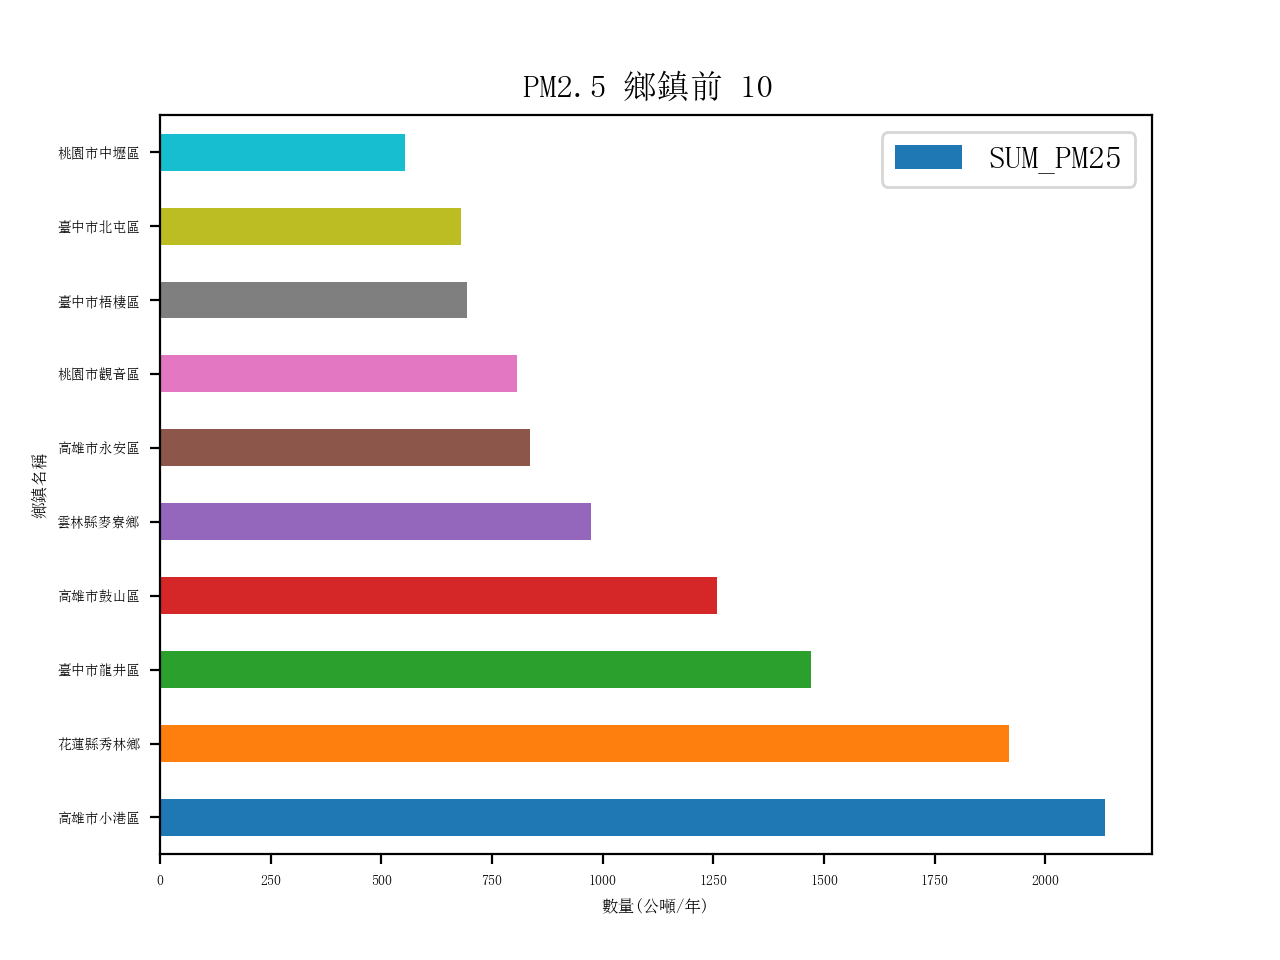

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

In [44]:
# 點線面鄉鎮 鄉鎮前十
#pd.set_option('display.max_columns', None)
df=pla_df.sort_values('SUM_PM25',ascending=False).head(10)

myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/SimSun.ttf',size=12)
df.plot('AREA',y='SUM_PM25',kind='barh') #line type have problem
plt.title("PM2.5 鄉鎮前 10 ",fontproperties=myfont) 
plt.ylabel('鄉鎮名稱',fontproperties=myfont,size=6)
plt.xlabel('數量(公噸/年)',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)


<IPython.core.display.Javascript object>


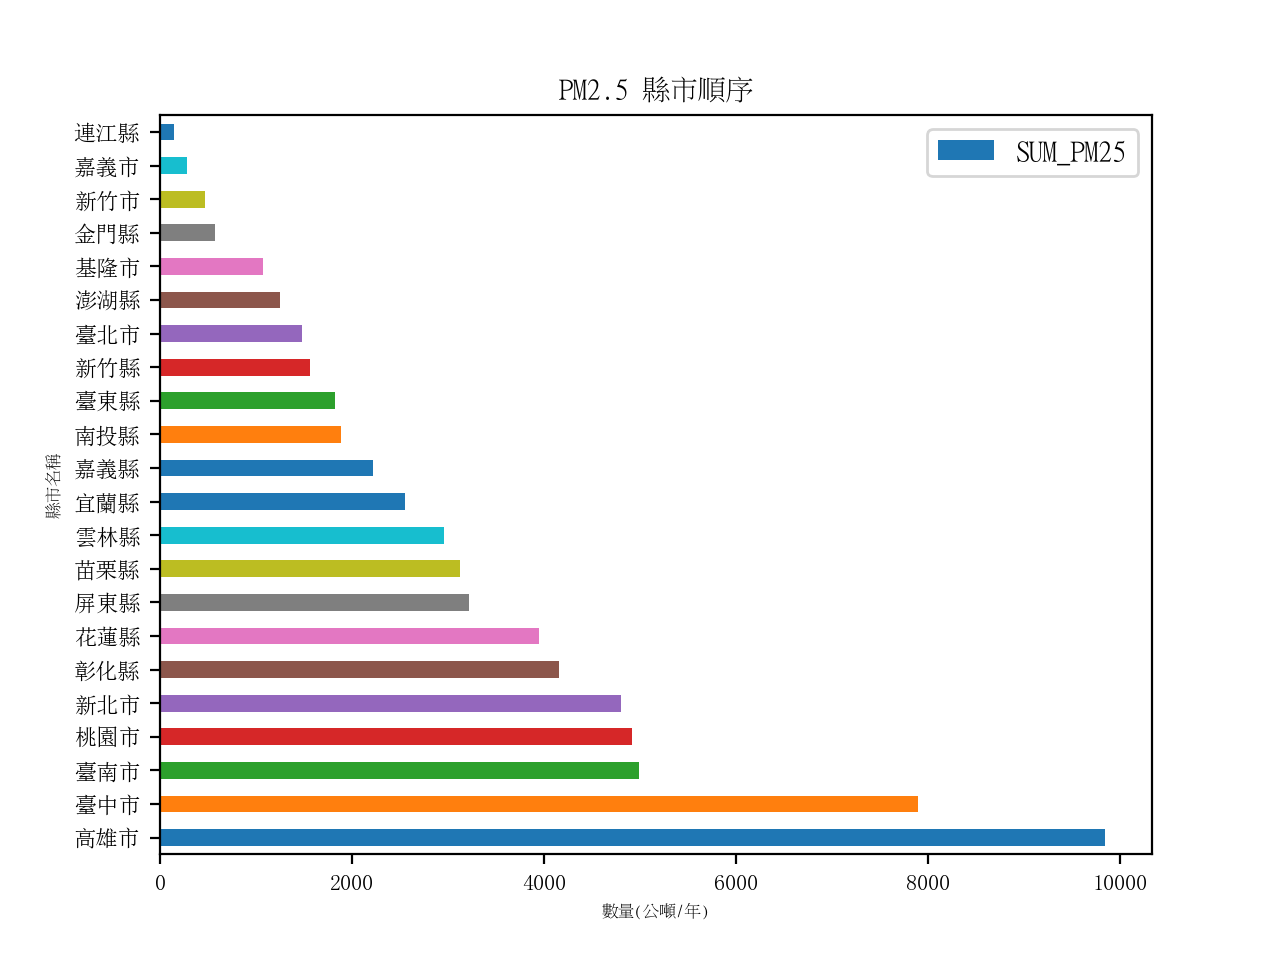

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text yticklabel objects>)

In [45]:
# 點線面鄉鎮 縣市前十
#pd.set_option('display.max_columns', None)
mon_s = pla_df.groupby('縣市名稱')['SUM_PM25'].sum().sort_values(ascending=False)

df = pd.DataFrame(mon_s)
df=df.reset_index()
#df=df.astype({'COMP_KIND1': 'int64'})

myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/MingLiU.ttf')
#df.plot.pie(x='縣市名稱',y='SUM_PM25',labels=df['縣市名稱'],legend = True, fontsize=14) #line type have problem
df.plot(x='縣市名稱',y='SUM_PM25',kind='barh') 
plt.title("PM2.5 縣市順序",fontproperties=myfont) 
plt.ylabel('縣市名稱',fontproperties=myfont,size=6)
plt.xlabel('數量(公噸/年)',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=8)
plt.yticks(fontname = 'SimSun',size=8)


<IPython.core.display.Javascript object>


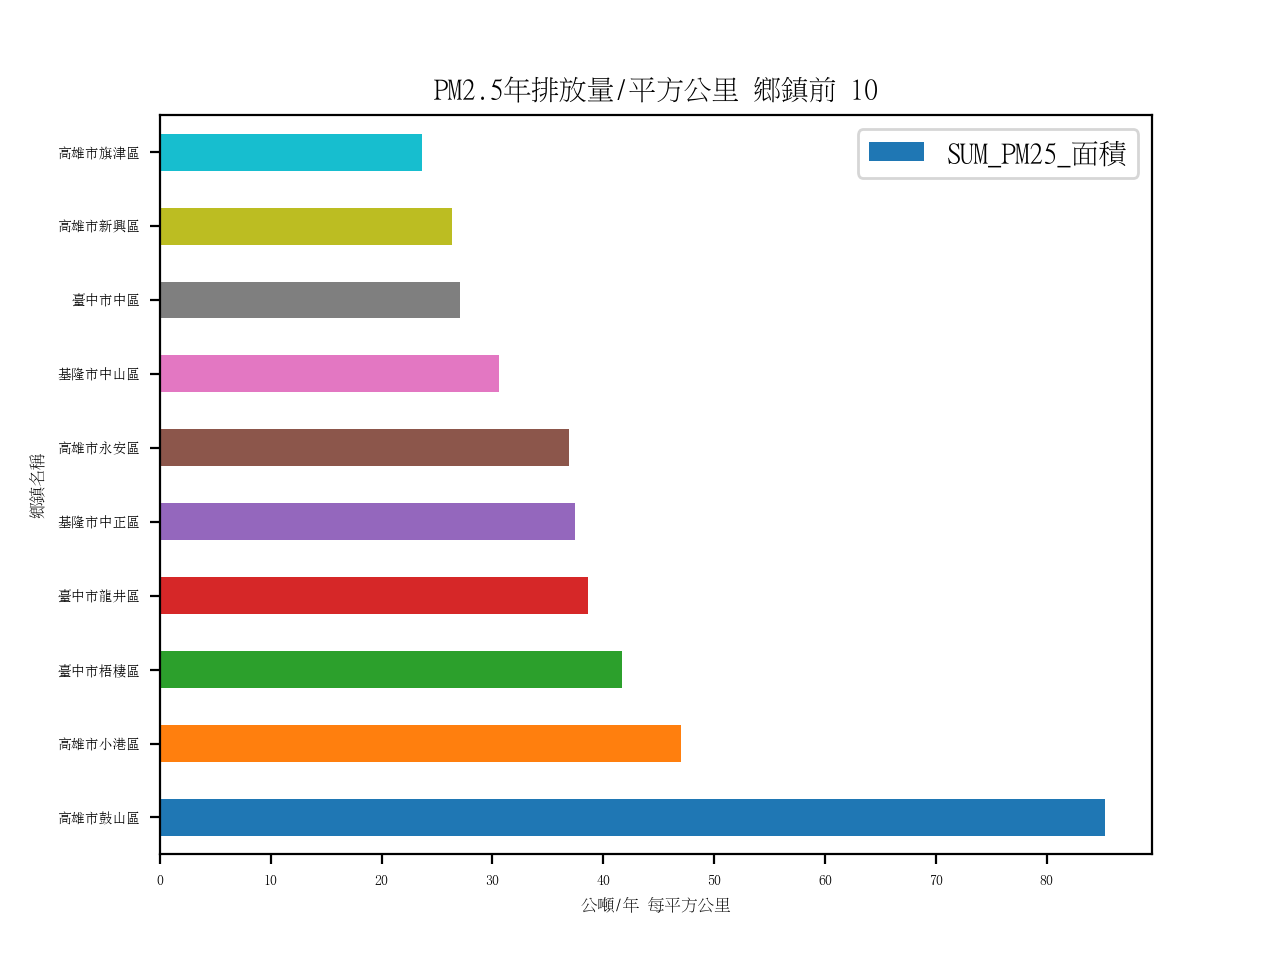

In [46]:
# 點線面鄉鎮 單位面積 鄉鎮前十
#pd.set_option('display.max_columns', None)
pla_df['SUM_PM25_面積']=pla_df['SUM_PM25']/pla_df['土地面積']
df=pla_df.sort_values('SUM_PM25_面積',ascending=False).head(10)

myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/MingLiU.ttf')
df.plot('AREA',y='SUM_PM25_面積',kind='barh',use_index=True) #line type have problem
plt.title("PM2.5年排放量/平方公里 鄉鎮前 10",fontproperties=myfont) 
plt.ylabel('鄉鎮名稱',fontproperties=myfont,size=6)
plt.xlabel('公噸/年 每平方公里',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)
plt.show()

<IPython.core.display.Javascript object>


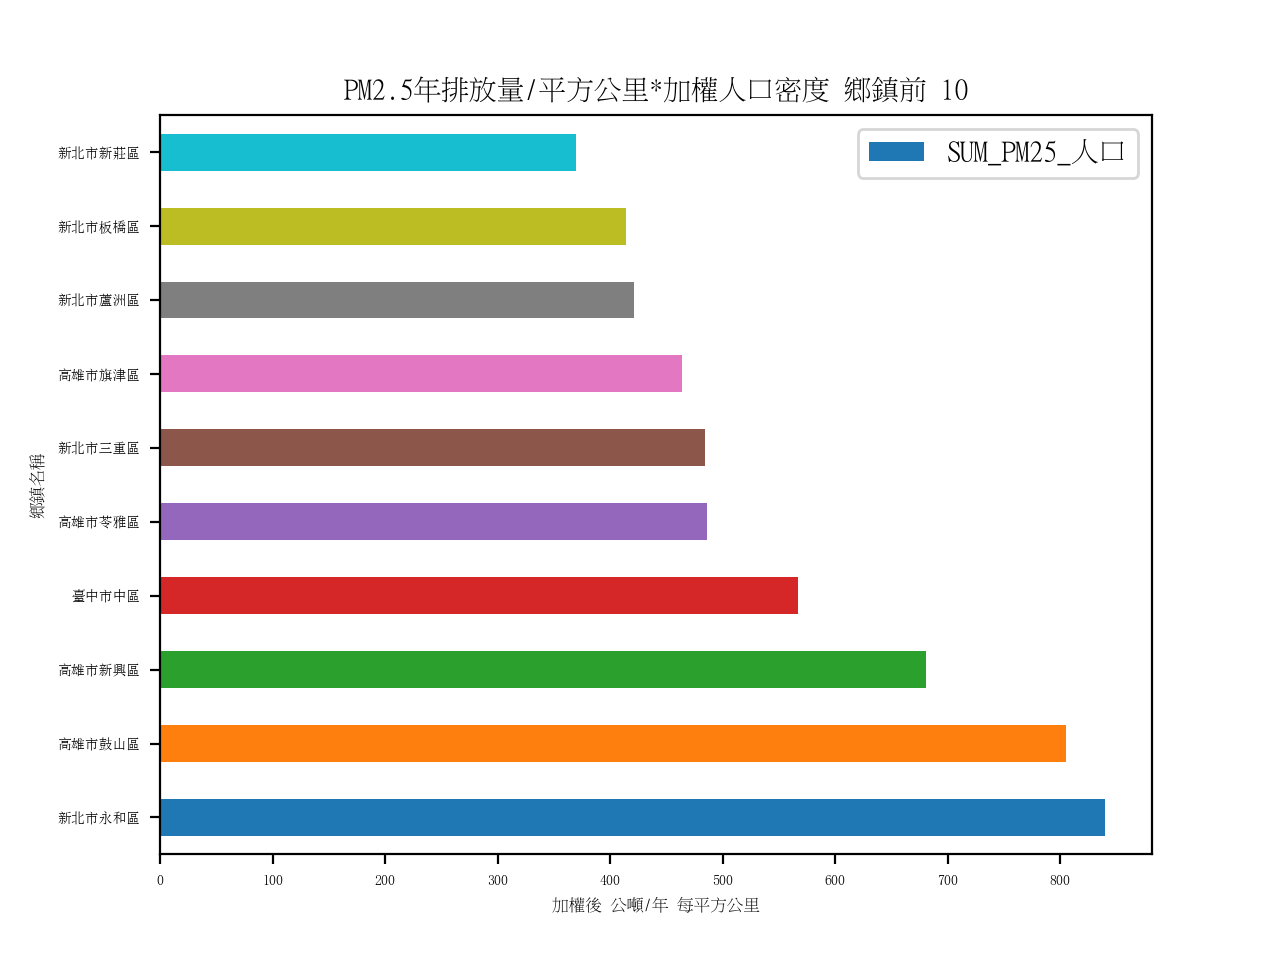

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

In [47]:
# 點線面鄉鎮 鄉鎮前十 by 人口加權
#pd.set_option('display.max_columns', None)
pla_df=pla_df.astype({'人口密度': 'float64'})
pla_df['SUM_PM25_人口']=pla_df['SUM_PM25']/pla_df['土地面積']*pla_df['人口密度']/1000 # 板橋 = 23835
df=pla_df.sort_values('SUM_PM25_人口',ascending=False).head(10)

myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/MingLiU.ttf')
df.plot('AREA',y='SUM_PM25_人口',kind='barh',use_index=True) #line type have problem
plt.title("PM2.5年排放量/平方公里*加權人口密度 鄉鎮前 10",fontproperties=myfont) 
plt.ylabel('鄉鎮名稱',fontproperties=myfont,size=6)
plt.xlabel('加權後 公噸/年 每平方公里',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)

In [48]:
# 每縣市的前三名
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pla_df.sort_values(['縣市名稱','SUM_PM25'],ascending=[1,0],inplace=True)
grouped = pla_df.groupby(['縣市名稱']).head(3)
grouped[['縣市名稱','鄉鎮名稱','SUM_PM25']]

,縣市名稱,鄉鎮名稱,SUM_PM25
171,南投縣,草屯鎮,314.762508
169,南投縣,南投市,283.013633
172,南投縣,竹山鎮,204.024533
332,嘉義市,西區,156.361628
331,嘉義市,東區,125.509460
204,嘉義縣,民雄鄉,289.815803
211,嘉義縣,太保市,239.425645
212,嘉義縣,水上鄉,204.979840
23,基隆市,中正區,382.015349
27,基隆市,中山區,321.537743


<IPython.core.display.Javascript object>


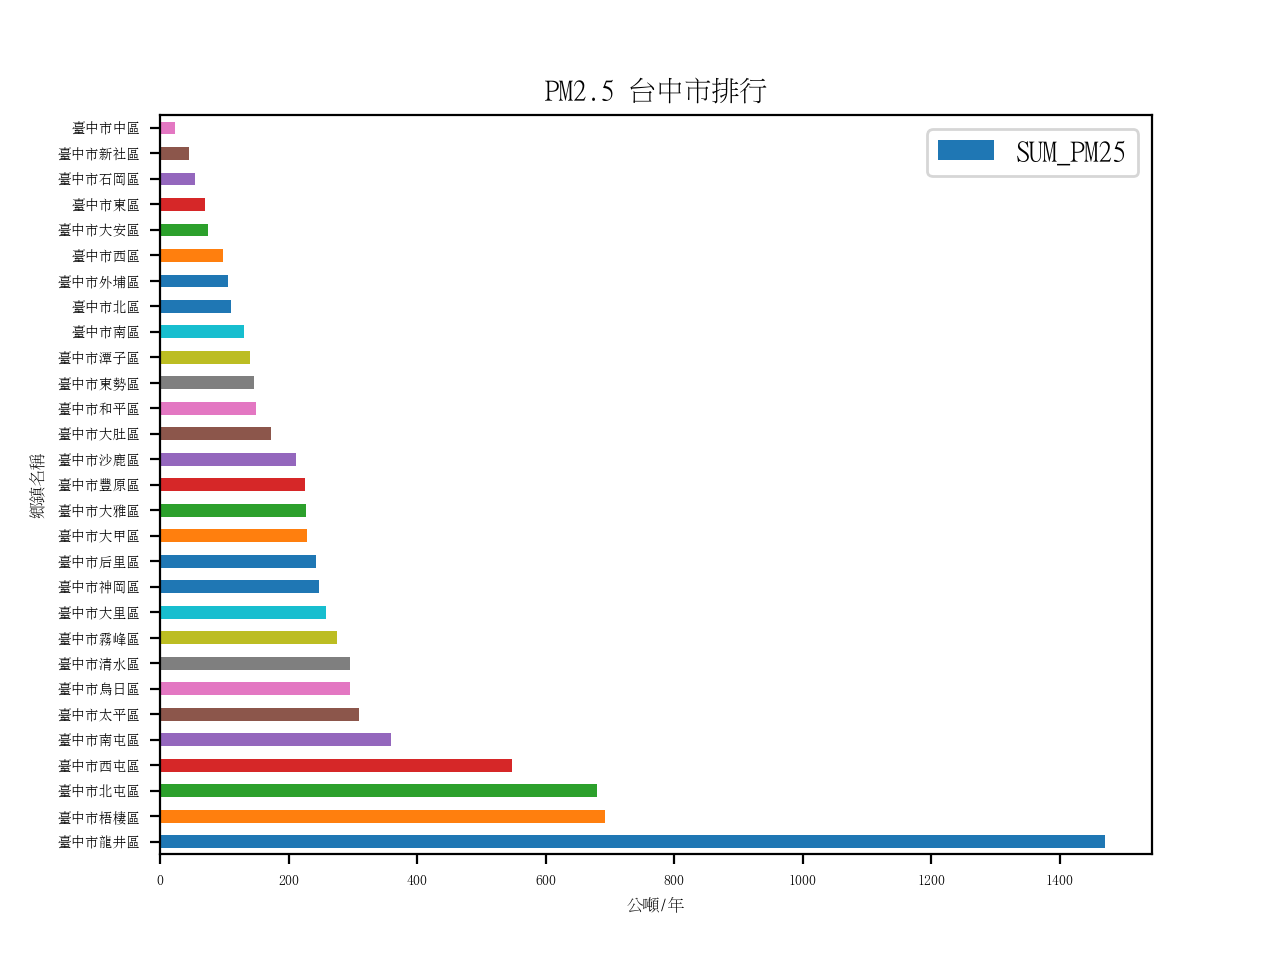

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text yticklabel objects>)

In [49]:
# 台中市排名
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pla_df[pla_df['縣市名稱']=='臺中市']
df = df.sort_values('SUM_PM25',ascending=False)
df=df[['AREA','POINT_PM25','LINE_PM25','AREA_PM25','SUM_PM25']].reset_index().drop('index',axis=1)


myfont = FontProperties(fname=r'/Library/Fonts/Microsoft/MingLiU.ttf')
df.plot('AREA',y='SUM_PM25',kind='barh',use_index=True) #line type have problem
plt.title("PM2.5 台中市排行",fontproperties=myfont) 
plt.ylabel('鄉鎮名稱',fontproperties=myfont,size=6)
plt.xlabel('公噸/年',fontproperties=myfont,size=6)
plt.legend(prop=myfont)
plt.xticks(fontname = 'SimSun',size=5)
plt.yticks(fontname = 'SimSun',size=5)

In [146]:
# 資料驗證正確性
#pd.set_option('display.max_rows', 20)
#pd.set_option('display.max_columns', None)
#area_df.groupby('DICT')['EM_PM25'].sum()
#point_df
#print(point_df[point_df['DICT_NO']=='0102']['TSP_EMI'].sum())
#print(line_df[line_df['DICT']=='0102']['EM_TSP'].sum())
#print(area_df[area_df['DICT']=='0102']['EM_TSP'].sum())
#pla_df[pla_df['鄉鎮代碼']==101][['POINT_PM25','LINE_PM25','AREA_PM25','SUM_PM25']]
#line_df.shape
#area_df.shape
#pla_df
#town_df.shape
#city_df.shape
#townp_df.shape
#pla_df
#pla_df['SUM_NH3']
#pla_df.isna()
#pla_df.all(axis=0)
#pla_df['index'].isna()
#pla_df.iloc[0].isna()
#pla_df.isna()
#pla_df.isna().any()
pla_df[pla_df['區域別'].isna()]
#pla_df[pla_df.isna().any()]

,Unnamed: 0,index,POINT_TSP,POINT_PM,POINT_PM25,POINT_SOX,POINT_NOX,POINT_THC,POINT_NMHC,POINT_CO,POINT_PB,LINE_TSP,LINE_PM,LINE_PM6,LINE_PM25,LINE_SOX,LINE_NOX,LINE_THC,LINE_NMHC,LINE_CO,LINE_PB,LINE_NH3,AREA_TSP,AREA_PM,AREA_PM6,AREA_PM25,AREA_SOX,AREA_NOX,AREA_THC,AREA_NMHC,AREA_CO,AREA_PB,AREA_NH3,SUM_TSP,SUM_PM,SUM_PM6,SUM_PM25,SUM_SOX,SUM_NOX,SUM_THC,SUM_NMHC,SUM_CO,SUM_PB,SUM_NH3,鄉鎮代碼,鄉鎮名稱,縣市代碼,縣市名稱,AREA,統計年,區域別,年底人口數,土地面積,人口密度
30,30,1200,111.533,72.311,54.881,398.250,916.051,975.662,678.219,156.878,0.062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.533,72.311,0.0,54.881,398.250,916.051,975.662,678.219,156.878,0.062,0.0,1200,新竹市,12,新竹市,新竹市新竹市,NaN,NaN,NaN,NaN,NaN
45,45,2200,32.525,22.177,17.592,21.407,104.015,109.885,89.674,44.312,0.331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.525,22.177,0.0,17.592,21.407,104.015,109.885,89.674,44.312,0.331,0.0,2200,嘉義市,22,嘉義市,嘉義市嘉義市,NaN,NaN,NaN,NaN,NaN


In [155]:
# merge GIS information - 0229
gisid_file = "dataset/town_tw97_teds_id.dbf" 

gisid_table = DBF(gisid_file,char_decode_errors='ignore',encoding='utf8',load=True)

cols = []
for field in gisid_table.fields:
    cols.append(field.name)
    #print("name=%s,type=%s" %(field.name,field.type))
gisid_df = pd.DataFrame(gisid_table.records,  columns =cols) 

gisid_df = gisid_df.astype({'TEDS_01_co': 'int64'})
plagis_df = pd.merge(pla_df, gisid_df, left_on='鄉鎮代碼',right_on='TEDS_01_co', how='left')
plagis_df.to_csv('output/點線面_鄉鎮.csv')
plagis_df


,Unnamed: 0,index,POINT_TSP,POINT_PM,POINT_PM25,POINT_SOX,POINT_NOX,POINT_THC,POINT_NMHC,POINT_CO,POINT_PB,LINE_TSP,LINE_PM,LINE_PM6,LINE_PM25,LINE_SOX,LINE_NOX,LINE_THC,LINE_NMHC,LINE_CO,LINE_PB,LINE_NH3,AREA_TSP,AREA_PM,AREA_PM6,AREA_PM25,AREA_SOX,AREA_NOX,AREA_THC,AREA_NMHC,AREA_CO,AREA_PB,AREA_NH3,SUM_TSP,SUM_PM,SUM_PM6,SUM_PM25,SUM_SOX,SUM_NOX,SUM_THC,SUM_NMHC,SUM_CO,SUM_PB,SUM_NH3,鄉鎮代碼,鄉鎮名稱,縣市代碼,縣市名稱,AREA,統計年,區域別,年底人口數,土地面積,人口密度,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,TEDS_01_co,TEDS_01__1,TEDS_01__2,點線面_,點線_1,點線_2,點線_3
0,0,101,6.255,3.664,2.546,5.944,7.093,4.139,4.071,2.256,0.159,99.600331,61.437815,0.0,46.409629,0.620816,459.688684,547.832047,498.174467,2116.324307,0.102990,0.0,616.392132,207.805175,0.0,62.183747,46.106950,257.892903,2205.966432,2000.165928,381.029610,0.0,0.0,722.247463,272.906990,0.0,111.139376,52.671766,724.674587,2757.937479,2502.411395,2499.609917,0.261990,0.0,101,松山區,1,臺北市,臺北市松山區,106.0,臺北市松山區,206988.0,9.2878,22286.0,A01,63000010,臺北市,松山區,Songshan District,A,63000,101.0,25334,25334,2.546,46.409629,62.183747,111.139376
1,1,102,6.194,3.734,2.425,0.100,4.511,0.400,0.380,2.289,0.000,78.995590,47.669944,0.0,35.536722,0.530944,314.812285,553.152094,503.148725,1982.708324,0.094631,0.0,663.700703,210.854609,0.0,58.449132,27.548319,74.113461,2326.012768,2101.060124,35.293605,0.0,0.0,748.890293,262.258553,0.0,96.410854,28.179263,393.436746,2879.564862,2604.588849,2020.290929,0.094631,0.0,102,信義區,1,臺北市,臺北市信義區,106.0,臺北市信義區,225753.0,11.2077,20143.0,A17,63000020,臺北市,信義區,Xinyi District,A,63000,102.0,25345,25345,2.425,35.536722,58.449132,96.410854
2,2,103,1.642,1.193,0.942,13.772,19.203,1.287,1.163,1.827,0.118,119.371593,72.265959,0.0,53.979099,0.789633,486.856187,796.069000,724.265047,2896.766732,0.138223,0.0,761.320310,185.480680,0.0,60.638030,37.555623,100.334070,3197.192372,2889.638593,74.782127,0.0,0.0,882.333903,258.939639,0.0,115.559129,52.117256,606.393257,3994.548372,3615.066640,2973.375859,0.256223,0.0,103,大安區,1,臺北市,臺北市大安區,106.0,臺北市大安區,309969.0,11.3614,27283.0,A02,63000030,臺北市,大安區,Daan District,A,63000,103.0,25335,25335,0.942,53.979099,60.638030,115.559129
3,3,104,1.976,1.497,1.225,11.782,14.223,4.431,4.355,4.535,0.045,75.618271,46.066552,0.0,34.538570,0.488927,320.092994,472.958941,430.702562,1748.979259,0.082640,0.0,547.036930,145.913269,0.0,53.085697,19.686697,74.790715,1678.495949,1519.739362,331.988256,0.0,0.0,624.631201,193.476821,0.0,88.849267,31.957624,409.106709,2155.885890,1954.796924,2085.502515,0.127640,0.0,104,中正區,1,臺北市,臺北市中正區,106.0,臺北市中正區,159608.0,7.6071,20981.0,A03,63000050,臺北市,中正區,Zhongzheng District,A,63000,104.0,25336,25336,1.225,34.538570,53.085697,88.849267
4,4,105,0.170,0.127,0.099,0.003,0.489,0.054,0.051,0.297,0.000,66.840743,40.387284,0.0,30.130539,0.450298,268.674524,469.260239,426.882743,1676.455862,0.079867,0.0,489.494326,138.657925,0.0,49.638505,23.476919,63.731502,2158.232370,1967.233229,264.028447,0.0,0.0,556.505069,179.172209,0.0,79.868044,23.930217,332.895026,2627.546609,2394.166972,1940.781309,0.079867,0.0,105,萬華區,1,臺北市,臺北市萬華區,106.0,臺北市萬華區,191850.0,8.8522,21673.0,A05,63000070,臺北市,萬華區,Wanhua District,A,63000,105.0,25337,25337,0.099,30.130539,49.638505,79.868044
5,5,106,0.921,0.678,0.545,0.000,1.237,1.217,0.833,0.771,0.028,81.067291,50.109128,0.0,37.902206,0.492919,382.272508,400.965566,364.794735,1615.459427,0.078563,0.0,398.531752,108.883526,0.0,38.917765,15.755371,46.935835,1437.930755,1309.492451,244.283757,0.0,0.0,480.520043,159.670654,0.0,77.364971,16.248290,430.445343,1840.113321,1675.120186,1860.514184,0.106563,0.0,106,大同區,1,臺北市,臺北市大同區,106.0,臺北市大同區,129278.0,5.6815,22754.0,A09,63000060,臺北市,大同區,Datong District,A,63000,106.0,25338,25338,0.545,37.902206,38.917765,77.364971
6,6,107,4.305,3.158,2.502,35.441,42.438,39.254,34.372,6.356,0.310,134.295190,82.902951,0.0,62.657535,0.819379,623.919689,687.062948,624.952905,2738.048675,0.133385,0.0,615.920354,155.337342,0.0,52.697973,28.360749,74.443145,2396.488159,2168.237489,172.563237,0.0,0.0,754.520544,24

In [50]:
# merge GIS information - 0301 
gisid_file = "dataset/TOWN_MOI_1080617.dbf" # 100214

gisid_table = DBF(gisid_file,char_decode_errors='ignore',encoding='utf8',load=True)

cols = []
for field in gisid_table.fields:
    cols.append(field.name)
    #print("name=%s,type=%s" %(field.name,field.type))
gisid_df = pd.DataFrame(gisid_table.records,  columns =cols) 

# making copy of team column 
townname = gisid_df["TOWNNAME"].copy() 
  
# concatenating team with name column 
# overwriting name column 
gisid_df["AREA"]= gisid_df["COUNTYNAME"].str.cat(townname, sep ="") 

#gisid_df = gisid_df.astype({'TEDS_01_co': 'int64'})
plagis_df = pd.merge(pla_df, gisid_df, left_on='AREA',right_on='AREA', how='left')
plagis_df.to_csv('output/TEDSSUM.csv')
#plagis_df

In [62]:
# 產生 CSVT
#df = plagis_df
def dfToCSVT(df):
    txt=""
    for s in df.dtypes:
        if s=="object":
            txt+="\"String\","
        if s=="float64":
            txt+="\"Real\","
        if s=="int64":
            txt+="\"Integer\","
    print(txt[:-1])
dfToCSVT(gis_point)

"Integer","Real","Real","Integer","Real","Real","Real","Real","Real","Real","Real","Real","Real","Real","Real","Real","Integer","Real","Integer","Integer","Integer","Integer","Integer","Integer","Real","Real","Real","Real","Real","Real","Real","Integer"


In [61]:
#df=df.astype({'UTM_E': 'float64'})
#df=df.astype({'UTM_N': 'float64'})
gis_point.dtypes

SERIAL_NO      int64
TSP_EMI      float64
PM_EMI       float64
X_BLANK1       int64
PM25_EMI     float64
SOX_EMI      float64
NOX_EMI      float64
THC_EMI      float64
NMHC_EMI     float64
CO_EMI       float64
PB_EMI       float64
UTM_E        float64
UTM_N        float64
ORI_QU1      float64
DIA          float64
HEI          float64
TEMP           int64
VEL          float64
HD1            int64
DW1            int64
WY1            int64
X_BLANK7       int64
X_BLANK10      int64
X_BLANK11      int64
TSP_EFF      float64
TSP_EFF1     float64
SOX_EFF      float64
NOX_EFF      float64
VOC_EFF      float64
CO_EFF       float64
PB_EFF       float64
ZS             int64
dtype: object

In [49]:
# 點源 產生一些範例資料給GIS 練習, point_sample
#point_df.groupby('COMP_NAM')['PM25_EMI'].sum().sort_values(ascending=False).head(100)
df1 = point_df[point_df['COMP_NAM'].str.contains('中國鋼鐵')]

towncode_df=towncode_df.astype({'鄉鎮代碼': 'int64'})
towncode_df=towncode_df.astype({'縣市代碼': 'int64'})
towncode_df=towncode_df.astype({'TOWNCODE': 'int64'})
towncode_df=towncode_df.astype({'COUNTYCODE': 'int64'})
df1=df1.astype({'DICT_NO': 'int64'})
df = pd.merge(df1, towncode_df, left_on='DICT_NO',right_on='鄉鎮代碼', how='left')
df=df.astype({'TOWNCODE': 'object'})
df=df.astype({'COUNTYCODE': 'object'})
df=df.astype({'UTM_E': 'float64'})
df=df.astype({'UTM_N': 'float64'})

#towncode_df.info()
#df.to_csv('output/中國鋼鐵.csv')
df.info()

#{‘鄉鎮代碼’: np.object, ‘縣市代碼’: np.int32, ‘c’: ‘Int64’}
#towncode_df = read_ods('dataset/db.ods',3,0)
#df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1656
Data columns (total 82 columns):
SERIAL_NO     1657 non-null int64
DICT_NO       1657 non-null int64
C_NO          1657 non-null object
SCC           1657 non-null object
NO_P          1657 non-null object
FC            1657 non-null object
TSP_EMI       1657 non-null float64
PM_EMI        1657 non-null float64
X_BLANK1      1657 non-null int64
PM25_EMI      1657 non-null float64
SOX_EMI       1657 non-null float64
NOX_EMI       1657 non-null float64
THC_EMI       1657 non-null float64
NMHC_EMI      1657 non-null float64
CO_EMI        1657 non-null float64
PB_EMI        1657 non-null float64
COMP_KIND1    1657 non-null object
UTM_E         1657 non-null float64
UTM_N         1657 non-null float64
ORI_QU1       1657 non-null float64
X_BLANK2      1657 non-null object
DIA           1657 non-null float64
X_BLANK3      1657 non-null object
HEI           1657 non-null float64
X_BLANK4      1657 non-null object
TEMP   

In [59]:
# 點源 產生網格給 GIS 觀察
#point_df.info()
df = point_df
df=df.astype({'UTM_E': 'float64'})
df=df.astype({'UTM_N': 'float64'})
#df.info()
df['UTM_EP'] = round(df['UTM_E']/1000)*1000
df['UTM_NP'] = round(df['UTM_N']/1000)*1000
gis_point = df.groupby(['UTM_EP','UTM_NP']).sum()
gis_point
#df
#gis_point
#gis_point.to_csv('output/gis_point.csv')

SERIAL_NO  TSP_EMI   PM_EMI  X_BLANK1  PM25_EMI  SOX_EMI  \
UTM_EP   UTM_NP                                                                
155000.0 2550000.0      41866    2.946    1.144         0     1.014   10.605   
158000.0 2562000.0    3006066    1.481    1.069         0     0.689    0.000   
         2569000.0    5225022   14.844   10.120         0     7.430    3.071   
159000.0 2548000.0      48346    0.000    0.000         0     0.000    0.000   
160000.0 2548000.0      24009   16.781    9.075         0     5.974    0.000   
         2549000.0      10689    0.000    0.000         0     0.000    0.000   
         2551000.0      10714    0.000    0.000         0     0.000    0.000   
         2559000.0      23724    0.000    0.000         0     0.000    0.000   
         2562000.0    1423719    0.012    0.008         0     0.005    0.000   
161000.0 2548000.0      59285    0.071    0.051         0     0.040    0.763   
         2549000.0      91570    0.000    0.000         0     0.000    0.000   
         2550000.0      36021    0.000    0.000         0     0.000    0.000   
         2551000.0     325786   13.558    7.455         0     4.932    2.032   
         2562000.0     632790    0.000    0.000         0     0.000    0.000   
         2567000.0    2375370    0.800    0.550         0     0.458   10.195   
162000.0 2548000.0      43934    0.006    0.003         0     0.003    0.211   
         2549000.0    2352835    1.710    1.076         0     0.774    2.821   
163000.0 2548000.0    1441302    0.237    0.160         0     0.124    0.003   
         2549000.0    5362136   14.836    9.930         0     7.260   18.477   
         2550000.0      93040    0.013    0.008         0     0.007    0.206   
         2557000.0     791010    0.000    0.000         0     0.000    0.000   
         2564000.0    1040613    0.028    0.018         0     0.013    0.039   
         2566000.0    4272561    1.861    1.370         0     1.133    1.190   
         2569000.0    4589859    0.000    0.000         0     0.000    0.000   
         2573000.0    1934625    0.295    0.190         0     0.135    0.000   
164000.0 2541000.0      38894    0.000    0.000         0     0.000    0.000   
         2544000.0      12189    0.000    0.000         0     0.000    0.000   
         2548000.0     388344    0.038    0.028         0     0.018    0.000   
         2549000.0     815495    0.440    0.414         0     0.396    2.858   
         2551000.0      10008    0.007    0.005         0     0.004    0.000   
...                       ...      ...      ...       ...       ...      ...   
334000.0 2727000.0    6448682    0.023    0.012         0     0.008    0.000   
         2728000.0    2928100    3.316    1.698         0     1.342   19.973   
         2729000.0     384918    0.136    0.099         0     0.078    1.304   
         2779000.0     838827    0.162    0.102         0     0.086    2.508   
335000.0 2719000.0      83997    0.021    0.015         0     0.012    0.000   
         2720000.0    9548732   48.871   31.118         0    21.565    0.000   
         2721000.0    2446527   16.598   10.680         0     7.565    0.000   
         2726000.0    4834800    0.000    0.000         0     0.000    0.000   
         2727000.0    2653234    0.001    0.001         0     0.001    2.945   
         2728000.0     192194    0.037    0.027         0     0.021    0.000   
         2729000.0     144882    0.000    0.000         0     0.000    0.000   
         2779000.0     114588    0.100    0.073         0     0.057    0.006   
336000.0 2719000.0    3873255    0.065    0.044         0     0.030    0.000   
         2720000.0    6329001   30.758   18.331         0    12.527    0.000   
         2721000.0   23718031  330.277  217.303         0   145.535   37.492   
         2722000.0     219035    0.000    0.000         0     0.000    0.124   
         2756000.0      88999    0.000    0.000         0     0.000    0.000   
338000.0 2716000.0  

In [54]:
# 線源 產生一些範例資料給 GIS 練習
# 有哪些網格點
gis_line = line_df.groupby(['UTME','UTMN']).sum()
gis_line
#gis_line.to_csv('output/gis_line.csv')

EM_TSP     EM_PM  EM_PM6   EM_PM25    EM_SOX     EM_NOX  \
UTME   UTMN                                                                 
155000 2549000  0.164776  0.112321     0.0  0.089329  0.000758   0.808094   
       2550000  0.389554  0.265549     0.0  0.211190  0.001797   1.910461   
       2551000  0.277187  0.188949     0.0  0.150271  0.001280   1.359379   
       2556000  0.392553  0.267592     0.0  0.212817  0.001812   1.925173   
       2557000  0.236707  0.161355     0.0  0.128326  0.001093   1.160876   
       2558000  0.141140  0.096209     0.0  0.076519  0.000651   0.692179   
156000 2549000  0.459472  0.313208     0.0  0.249095  0.002121   2.253368   
       2550000  0.459947  0.313531     0.0  0.249351  0.002124   2.255690   
       2551000  0.377166  0.257106     0.0  0.204475  0.001741   1.849710   
       2552000  0.208475  0.142110     0.0  0.113021  0.000959   1.022402   
       2553000  0.014518  0.010204     0.0  0.008249  0.000058   0.074275   
       2554000  0.299195  0.208167     0.0  0.167391  0.001250   1.479273   
       2555000  0.446923  0.308777     0.0  0.247360  0.001942   2.211139   
       2556000  0.304691  0.211823     0.0  0.170249  0.001287   1.513609   
       2557000  0.453910  0.313542     0.0  0.251150  0.001974   2.245406   
       2558000  0.402334  0.278383     0.0  0.223189  0.001737   1.992483   
       2559000  0.268938  0.187484     0.0  0.150915  0.001122   1.338447   
       2560000  0.266928  0.186078     0.0  0.149782  0.001111   1.328354   
       2561000  0.454874  0.318007     0.0  0.256361  0.001892   2.285537   
       2562000  0.268915  0.187479     0.0  0.150918  0.001123   1.338683   
       2563000  0.237604  0.165636     0.0  0.133328  0.000993   1.182480   
       2565000  0.326740  0.222725     0.0  0.177135  0.001505   1.602400   
       2566000  0.303322  0.206765     0.0  0.164439  0.001401   1.487558   
       2567000  0.281554  0.191925     0.0  0.152641  0.001299   1.380805   
157000 2549000  0.683504  0.465924     0.0  0.370549  0.003154   3.352066   
       2550000  1.224666  0.834817     0.0  0.663931  0.005650   6.006045   
       2551000  0.094223  0.064230     0.0  0.051087  0.000433   0.462103   
       2552000  1.014595  0.691618     0.0  0.550045  0.004683   4.975814   
       2553000  0.084543  0.057630     0.0  0.045832  0.000389   0.414614   
       2554000  0.193500  0.131904     0.0  0.104902  0.000869   0.927160   
...                  ...       ...     ...       ...       ...        ...   
347000 2765000  0.024991  0.016134     0.0  0.012488  0.000153   0.119854   
       2766000  0.064175  0.041427     0.0  0.032063  0.000392   0.307732   
       2768000  0.725051  0.555947     0.0  0.467000  0.003044   6.415396   
       2871000  0.027456  0.022069     0.0  0.018884  0.000099   0.235770   
       2872000  0.527550  0.424056     0.0  0.362895  0.001917   4.530145   
       2873000  0.144080  0.115815     0.0  0.099113  0.000522   1.237248   
       2900000  0.222991  0.179243     0.0  0.153394  0.000811   1.914858   
       2901000  0.596042  0.479112     0.0  0.410011  0.002169   5.118311   
348000 2764000  0.352866  0.270565     0.0  0.227278  0.001482   3.122207   
       2765000  0.487386  0.373711     0.0  0.313924  0.002044   4.312487   
       2768000  0.674873  0.517475     0.0  0.434682  0.002835   5.971411   
       2872000  0.125445  0.100836     0.0  0.086293  0.000456   1.077225   
       2873000  0.109217  0.087791     0.0  0.075128  0.000396   0.937861   
       2901000  0.904100  0.726736     0.0  0.621921  0.003285   7.763659   
       2902000  0.227832  0.183138     0.0  0.156723  0.000826   1.956433   
349000 2765000  0.730057  0.559787     0.0  0.470226  0.003065   6.459686   
       2766000  0.110374  0.084631     0.0  0.071089  0.000464   0.976608   
       2767000  0.965509  0.735952     0.0  0.616667  0.004122   8.396898   
       2768000  0.700513  0.537136     0.0  0.451195  0.002943   6.198296   
       2901000

In [56]:
# 面源 產生一些範例資料給 GIS 練習
#area_df
# 有哪些網格點
gis_area = area_df.groupby(['UTME','UTMN']).sum()
#gis_area.to_csv('output/gis_area.csv')

In [187]:
######   以下為備註的項目，可隨意刪除 ########

In [ ]:
# backup
"""
townp_df=pd.read_csv('output/town_people.csv') #8410
townp_df = townp_df.drop('0',axis=1)


#area_df.groupby('DICT')['EM_PM25'].sum().count()
#line_df.groupby('DICT')['EM_PM25'].sum().count()
#line_df.groupby('DICT')['EM_PM25'].sum()
ua=area_df['DICT'].unique()
ul=line_df['DICT'].unique()
difference = list(set(ua).difference(set(ul)))
#difference
area_df[area_df['DICT']=='5006']
"""

In [26]:
a = 184402
b = round(a/1000)*1000
b

184000